In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1xNUztlVWzlxf1abVIwHoCYoOiVdwbGttlJsf1CncDvM/edit#gid=0')

In [0]:
sheet = wb.worksheet('Feuille 1')

In [0]:
data = sheet.get_all_values()

In [0]:
label = data.pop(0)

In [0]:
meteo = [l[0] for l in data]
classm = [l[1] for l in data]
envie = [l[2] for l in data]
duree = [float(l[3]) for l in data]

In [0]:
import pandas as pd
df = pd.DataFrame({'meteo':meteo,'clasmt':classm,'envie':envie,'duree':duree})

In [11]:
pd.get_dummies(df)

,duree,meteo_-10°C,meteo_0°C,meteo_20°C,meteo_35°C,clasmt_153,clasmt_30,clasmt_304,envie_non,envie_oui
0,15.0,0,0,0,1,0,0,1,1,0
1,30.0,0,0,1,0,0,0,1,0,1
2,18.0,0,1,0,0,0,0,1,1,0
3,8.0,1,0,0,0,0,0,1,1,0
4,19.0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
499,12.0,1,0,0,0,0,1,0,1,0
500,34.0,0,0,0,1,1,0,0,0,1
501,88.0,0,0,1,0,1,0,0,0,1
502,52.0,0,1,0,0,1,0,0,0,1


In [15]:
df.apply(lambda x: pd.factorize(x)[0])

,meteo,clasmt,envie,duree
0,0,0,0,0
1,1,0,1,1
2,2,0,0,2
3,3,0,0,3
4,0,1,0,4
...,...,...,...,...
499,3,1,0,7
500,0,2,1,8
501,1,2,1,9
502,2,2,1,10


In [0]:
import pandas as pd
df = pd.DataFrame({'meteo':meteo,'clasmt':classm,'envie':envie,'duree':duree})
df['meteo_fact'] = pd.factorize(df.meteo)[0]
df['clasmt_fact'] = pd.factorize(df.clasmt)[0]
df['envie_fact'] = pd.factorize(df.envie)[0]

In [0]:
X = df[['meteo_fact','clasmt_fact']].values
Y = df['envie_fact'].values

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)


clf = GradientBoostingClassifier().fit(X_train, y_train)

In [0]:
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of GBDT classifier on training set: 0.88
Accuracy of GBDT classifier on test set: 0.90


In [0]:
X_test2 = [[2, 1],
       [1, 0],
       [0, 2],
       [0, 1],
       [3, 3],
       [3, 0]]

In [0]:
clf.predict(X_test2)

array([1, 1, 1, 0, 1, 0])

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X = df[['meteo_fact','clasmt_fact']].values
Y = df['duree'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)


mod = GradientBoostingRegressor().fit(X_train, y_train)

In [0]:
print('Accuracy of GBDT model on training set: {:.2f}'
     .format(mod.score(X_train, y_train)))
print('Accuracy of GBDT model on test set: {:.2f}'
     .format(mod.score(X_test, y_test)))

Accuracy of GBDT model on training set: 0.99
Accuracy of GBDT model on test set: 0.99


Automatically created module for IPython interactive environment
Classification accuracy without selecting features: 0.789
Classification accuracy after univariate feature selection: 0.868


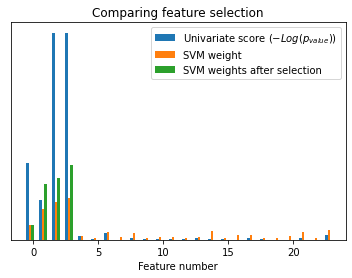

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# #############################################################################
# Import some data to play with

# The iris dataset
X, y = load_iris(return_X_y=True)

# Some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((X, E))

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0
)

plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')

# #############################################################################
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight')

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

In [2]:
X

array([[5.10000000e+00, 3.50000000e+00, 1.40000000e+00, ...,
        5.24756432e-02, 4.31945019e-02, 2.91229140e-02],
       [4.90000000e+00, 3.00000000e+00, 1.40000000e+00, ...,
        9.76721140e-03, 6.84233027e-02, 4.40152494e-02],
       [4.70000000e+00, 3.20000000e+00, 1.30000000e+00, ...,
        1.95982862e-02, 4.52272889e-03, 3.25330331e-02],
       ...,
       [6.50000000e+00, 3.00000000e+00, 5.20000000e+00, ...,
        8.61690904e-02, 2.74071589e-02, 8.07070904e-02],
       [6.20000000e+00, 3.40000000e+00, 5.40000000e+00, ...,
        1.14179835e-03, 7.03699780e-02, 9.70257110e-02],
       [5.90000000e+00, 3.00000000e+00, 5.10000000e+00, ...,
        3.09787859e-02, 2.90045532e-02, 8.71414034e-02]])